In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In this assignment you are going to see an interesting thing that you can do with PCA, namely classify and deform shapes. We describe each shape with a set of landmark points, and then treat those points as the data.

The dataset we are going to use is a set of outline contours of leaves. The original images of the leaves, and information about the dataset is available at http://www.cvl.isy.liu.se/en/research/datasets/swedish-leaf/ in case you are interested, but you do not need it.

The dataset we will use (`SwedishLeaves.csv`) is on Blackboard. It consists of the outline contours of the leaves from the webpage above, using 200 points around the outline of each leaf. 

There are 440 contours, and 15 different leaf classes, with around 30 examples of each leaf.

The data matrix is arranged so that each row is a leaf, in order 
- x1, y1, x2, y2, x3, y3, ..., x200, y200, class

The class is a number from 1 to 15. The list of leaf names (in order) is given below. 

Task 1: Load the data, and plot a couple of different leaves in their own figures. Make the title of the figure be the class of the leaf by using the names in the cell below. The output should like my example below (remember that the first class is class 1, not class 0). (5 marks)

In [257]:
names = ['Ulmus Minor', 'Acer Platanoides', 'Ulmus Laevis', 'Quercus Robur', 
         'Betula Pubescens', 'Tilia Platyphyllos', 'Salix Fragilis', 'Populus Tremula', 
         'Ulmus Glabra', 'Sorbus Aucuparia', 'Prunus Padus', 'Tilia Cordata', 'Populus Sp.',
         'Scandosorbus Intermedia', 'Fagus Sylvatica']

ERROR! Session/line number was not unique in database. History logging moved to new session 390


In [258]:
leaves = pd.read_csv("SwedishLeaves.csv", header = None)
leaves.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,-0.298901,-1.5,-0.151077,-1.467805,-0.037531,-1.365821,0.094352,-1.430738,0.255559,-1.442186,...,-1.402811,-0.663131,-1.463335,-0.549618,-1.500000,-0.418519,-1.498208,-0.298901,-1.5,10.0
1,-0.314211,-1.5,-0.218206,-1.433215,-0.139793,-1.353441,-0.075839,-1.253793,-0.023513,-1.142516,...,-1.127314,-0.320712,-1.227431,-0.374317,-1.333361,-0.383979,-1.436232,-0.314211,-1.5,10.0
2,-0.343490,-1.5,-0.238900,-1.446750,-0.147424,-1.360546,-0.061559,-1.258742,0.024574,-1.149368,...,-1.083749,-0.306309,-1.195531,-0.361686,-1.303204,-0.406440,-1.423495,-0.343490,-1.5,10.0
3,0.041703,-1.5,0.110975,-1.420355,0.135924,-1.309865,0.182896,-1.270870,0.238861,-1.177919,...,-1.114669,-0.111061,-1.233570,-0.083409,-1.345471,-0.037111,-1.431843,0.041703,-1.5,10.0
4,-0.452760,-1.5,-0.348141,-1.418461,-0.264912,-1.329461,-0.175809,-1.242895,-0.094373,-1.141614,...,-1.041837,-0.403325,-1.162075,-0.450946,-1.273163,-0.487379,-1.397046,-0.452760,-1.5,10.0


## Separate the classes from the data

In [259]:
classes = leaves.iloc[:, -1]

In [260]:
leaves.shape

(440, 401)

In [261]:
def plot_leaf(i):
    """Plots the leaf at the specified index"""
    leaves_x = leaves.iloc[i,0:-1:2]
    leaves_y = leaves.iloc[i,1::2]
    plt.plot(leaves_x, leaves_y, '.-')
    plt.title(names[int(leaves.iloc[i, -1]-1)]) # the class is the last column of the dataframe

In [262]:
def plot_first(leaf_name):
    """Plots the first occurence of a leaf with a given class name"""
    leaf_class = names.index(leaf_name) + 1
    matched_leaves = leaves.loc[classes == leaf_class]
    plot_leaf(matched_leaves.index[0])

In [263]:
def plot_all(leaf_name):
    """Plot all leaves with a given class name"""
    leaf_class = names.index(leaf_name) + 1
    matched_leaves = leaves.loc[leaves.iloc[:,-1] == leaf_class]
    tot = len(matched_leaves)
    cols = 3
    rows = tot // cols
    if rows != 0:
        rows += 1
    pos = range(1, tot+1)
    fig = plt.figure(figsize=(15, 3*rows))
    for i in range(tot):
        ax = fig.add_subplot(rows, cols, pos[i])
        ax.plot(matched_leaves.iloc[i,0:-2:2], matched_leaves.iloc[i,1::2], '.-')
        ax.set_title(leaf_name + " Example " + str(i+1))
    plt.tight_layout()

In [264]:
def plot_all(leaf_class):
    """Plot all leaves with a given class"""
    matched_leaves = leaves.loc[leaves.iloc[:,-1] == leaf_class]
    tot = len(matched_leaves)
    cols = 3
    rows = tot // cols
    if rows != 0:
        rows += 1
    pos = range(1, tot+1)
    fig = plt.figure(figsize=(15, 3*rows))
    for i in range(tot):
        ax = fig.add_subplot(rows, cols, pos[i])
        ax.plot(matched_leaves.iloc[i,0:-2:2], matched_leaves.iloc[i,1::2], '.-')
        ax.set_title(names[int(leaves.iloc[i, -1]-1)] + " Example " + str(i+1))
    plt.tight_layout()

In [265]:
def plot_average_leaves():
    """Plots the average leaf of each leaf type"""
    fig = plt.figure(figsize = (15, len(names)))
    grouped_leaves = leaves.groupby(leaves.iloc[:,-1])
    for i in range(1, 16):
        ax = fig.add_subplot(5, 3, i)
        leaf = grouped_leaves.get_group(i)
        ax.plot(leaf.iloc[:,0:-2:2].mean(),
                leaf.iloc[:,1::2].mean(), '.-')
        ax.set_title(names[i-1])
        plt.tight_layout()

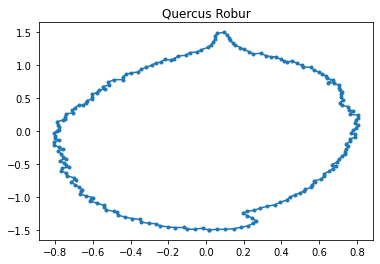

In [266]:
plot_first("Quercus Robur")

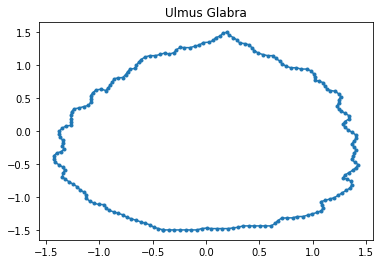

In [267]:
plot_first("Ulmus Glabra")

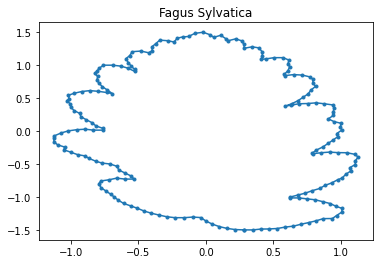

In [268]:
plot_first(names[14])

We are going to apply PCA to the dataset in order to reduce the number of dimensions. 

Task 2: Use one of the PCA implementations (either mine or the sklearn one) and make a scree plot of the total explained variance for the first 100 principal components. Use that to decide how many principal components to use. Clearly write the number of PCs you pick, with a reason. (3 marks)

In [269]:
clean_leaves = leaves.iloc[:,:-1:]
mean_leaf = np.mean(clean_leaves, axis = 0)

In [270]:
# Here is PCA

# Subtract off the mean with the classes removed.
data = clean_leaves - mean_leaf

# Compute the covariance matrix
C = np.cov(data.T)

# Get the eigenvalues and eigenvectors
evals,evecs = np.linalg.eig(C)

# Now need to sort them into descending order
indices = np.argsort(evals)
indices = indices[::-1]
evecs = evecs[:,indices]
evals = evals[indices]

# Transform the data
newdata = np.dot(evecs.T,data.T).T


c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


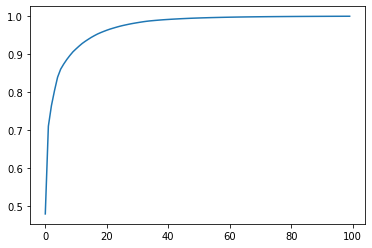

In [271]:
plt.plot(np.cumsum(evals)[:100]/np.sum(evals));

An appropriate number of Principal Components is 15, at roughly the knee of the scree plot.

Before we do any more with that, let's see how crazy we can get. 

Task 3: Compute the first two principal components, and plot the points in 2D with a different colour for each class. Comment on the results. (3 marks)

(440, 400)


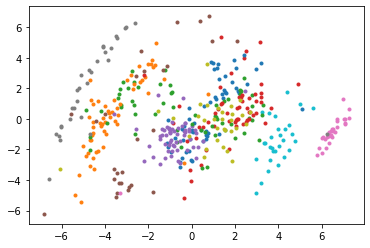

In [272]:
print(newdata.shape)
for i in range(0, len(classes)):
    plt.plot(newdata[i,0], newdata[i,1], '.', color = 'C' + str(int(classes[i])-1))

We can see the principal components has separated some classes from others, but there is still a lot of overlap.

Task 4: Take the PCA transformed data in 2D, 5D, 10D, and 100D and invert the PCA transformation. Plot a few examples for each of those datasets. 
Plot the original shape too. I've made my plots using `fig, axs = pl.subplots(5, 5, sharex=True, sharey=True)` to show the grid and then `axs[i,j].plot()` to plot in the different axes within it. 

Do your observations make you want to change the number of principal components to use?
(5 marks)

In [273]:
def inverse_pca(data, components):
    pca = PCA(n_components = components)
    transformed = pca.fit_transform(data)
    return pca.inverse_transform(transformed)

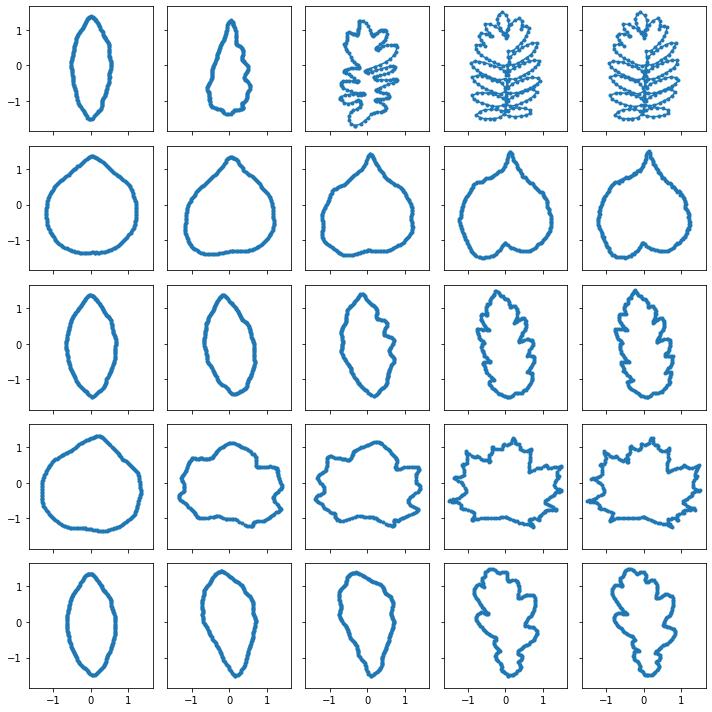

In [274]:
fig, axs = plt.subplots(5, 5, sharex = True, sharey = True, figsize = (10,10))
inversed = inverse_pca(clean_leaves, 2)
dimensions = [2,5,10,100,400]
for i in range(0, 5):
    inversed = inverse_pca(clean_leaves, dimensions[i])
    for j in range(0,5):
        axs[j,i].plot(inversed[j * 70,0::2], inversed[j * 70,1::2], '.-')
fig.tight_layout()
plt.show()


100 principal components is the best, as it is the only one that is able to reconstruct the original shape. There is a little bit of distortion in the 5D and 10D cases, but it is not too bad. It is difficult to see the original shape in the 2D case, as the principal components are not able to capture the shape well enough. 
However, 10d may be the best option, as it is able to reconstruct the shape well enough to be distinguished from the rest and is exponentially computationally less expensive than 100d. I would like to see this in 15D, 20D & 25D as well.

It looks like you do need more -- look at indices 2, 287 and 356

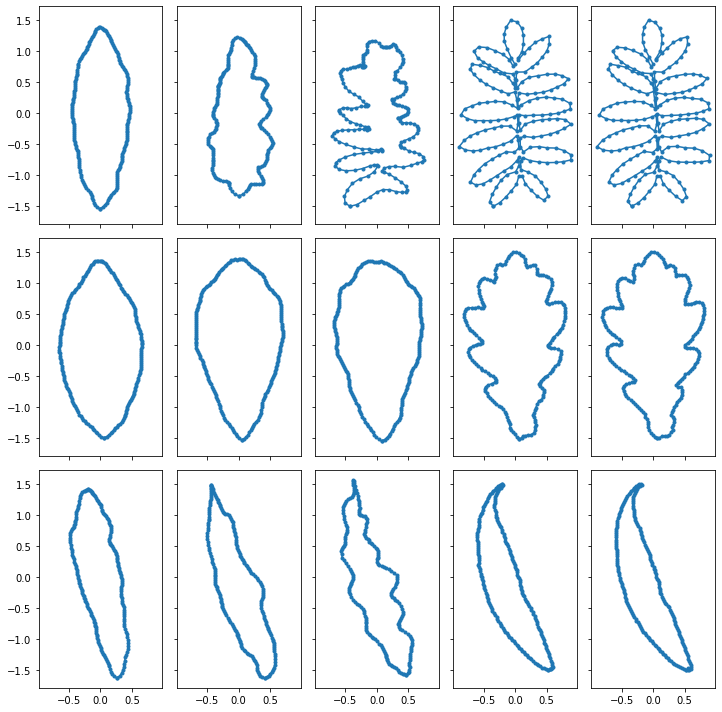

In [275]:
fig, axs = plt.subplots(3, 5, sharex = True, sharey = True, figsize = (10,10))
inversed = inverse_pca(clean_leaves, 2)
dimensions = [2,5,10,100,400]
for i in range(0, 5):
    inversed = inverse_pca(clean_leaves, dimensions[i])
    axs[0,i].plot(inversed[2,0::2], inversed[2,1::2], '.-')
    axs[1,i].plot(inversed[287,0::2], inversed[287,1::2], '.-')
    axs[2,i].plot(inversed[356,0::2], inversed[356,1::2], '.-')
    
fig.tight_layout()
plt.show()


We are now going to look at the effect of the first few principal components. 
Use the 5D PCs. 

Task 5: For classes 2, 7 and 10, compute the mean shape for that class (so find the data rows that correspond to those classes and compute the mean of those datapoints), and then plot that plus and minus 3 standard deviations for each of the 5 PCs. If you use the sklearn implementation of PCA then the components are in `PCA.components_` (4 marks)

In [276]:
def get_class(leaf_class):
    return clean_leaves.loc[classes == leaf_class]

In [277]:
def class_mean_features(leaf_class):
    """Returns the mean of the features of a given class"""
    return get_class(leaf_class).mean()

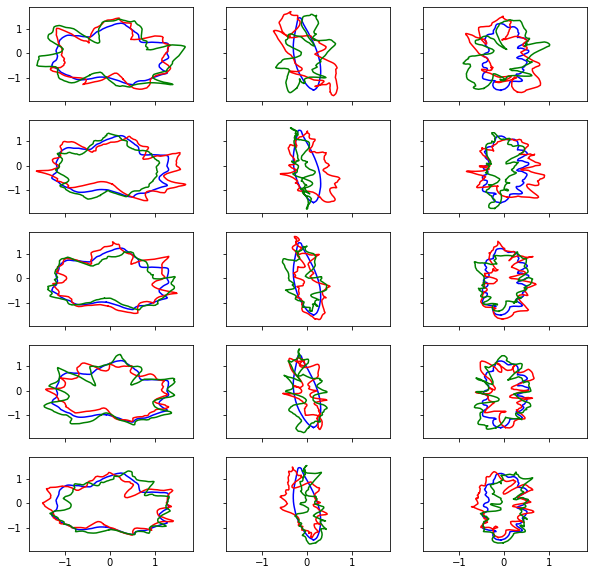

In [281]:
def calculate_evals_evecs(leaf_class):
    ## calculate mean leaves for class (raw data)
    class_mean = get_class(leaf_class).mean()
    mean_x = class_mean[0::2]
    mean_y = class_mean[1::2]
    ## caculate std for each PC
    pca = PCA(n_components = 5)
    pca.fit_transform(get_class(2))

    ## store the eigenvalues and eigenvectors
    evecs = pca.components_
    evals = pca.explained_variance_
    return mean_x, mean_y, evals, evecs

# plot mean
fig, axs = plt.subplots(5,3, sharex = True, sharey = True, figsize = (10,10))
desired_classes = [2,7,10]
for i in range(0,3):
    mean_x, mean_y, evals, evecs = calculate_evals_evecs(desired_classes[i])
    for pc in range(0,5):
        axs[pc,i].plot(mean_x, mean_y, 'b')
        axs[pc,i].plot(mean_x - 3 * np.sqrt(evals[pc]) * evecs[pc, 0::2], 
                    mean_y - 3 * np.sqrt(evals[pc]) * evecs[pc, 1::2], 'r')
        axs[pc,i].plot(mean_x + 3* np.sqrt(evals[pc]) * evecs[pc, 0::2], 
                    mean_y + 3 * np.sqrt(evals[pc]) * evecs[pc, 1::2], 'g')

Task 6: Use the Support Vector Machine that you saw with Binh (using `from sklearn.svm import SVC`) to classify the leaves using a training set of 75% of the data and testing on the rest with the 5D dataset. You will need to use the whole classification pipeline. Show the test accuracy and the  confusion matrix and comment on the results. (5 marks)


In [282]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

train_test_split

Results are pretty good! Even the errors are into related classes, not random, mostly.